In [12]:
from kce.evaluate import pre_process, node_classification_pipeline
from kce.walk_based import deepwalk, corewalk
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
G = nx.read_gml(".\\..\\data\\dblp.gml" )

In [3]:
params = dict(
    out_dim=150,
    n_walks=10,
    walk_length=25,
    win_size=5,
)

## Training

In [5]:
res_deep = node_classification_pipeline(graph=G,
                                embedder=deepwalk.DeepWalk(**params),
                                classifier=sklearn.linear_model.LogisticRegression(C=1))

C:\Users\sbran\Anaconda3\envs\projet_recherche\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sbran\Anaconda3\envs\projet_recherche\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [28]:
res = node_classification_pipeline(G,
                                embedder=corewalk.CoreWalkLinear(**params, coef=0.25),
                                classifier=sklearn.linear_model.LogisticRegression(C=1))

C:\Users\sbran\Anaconda3\envs\projet_recherche\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sbran\Anaconda3\envs\projet_recherche\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


26


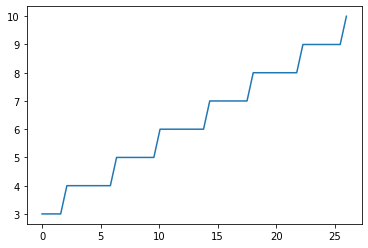

In [27]:
k_max = max(nx.core_number(G).values())
print(k_max)

cw = corewalk.CoreWalkLinear(**params, coef=0.25)

X = np.linspace(0, k_max)
plt.plot(X, [cw._n_walks(k, k_max) for k in X])
plt.show()

In [30]:
range(k_max + 1)

range(0, 27)

## Display results

In [29]:
print("--- Vanilla DeepWalk ---")
print("Micro F1 score: {:.3f}".format(res_deep["micro_f1"]))
print("Macro F1 score: {:.3f}".format(res_deep["macro_f1"]))
print("Exec time: {:.2f} s".format(res_deep["rw_gen_time"] + res_deep["embed_train_time"]))
print()
print("--- Modified DeepWalk ---")
print("Micro F1 score: {:.3f}  (- {:.2f} %)"
      .format(res["micro_f1"], 
              (res_deep["micro_f1"] - res["micro_f1"]) * 100 / res_deep["micro_f1"]
             ))
print("Macro F1 score: {:.3f}  (- {:.2f} %)"
      .format(res["macro_f1"], 
              (res_deep["macro_f1"] - res["macro_f1"]) * 100 / res_deep["macro_f1"]
             ))
print("Exec time: {:.2f} s     (- {:.2f} %)".format(
    res["rw_gen_time"] + res["embed_train_time"],
    ((res_deep["rw_gen_time"] + res_deep["embed_train_time"]) - (res["rw_gen_time"] + res["embed_train_time"])) * 100 / (res_deep["rw_gen_time"] + res_deep["embed_train_time"])
    ))

--- Vanilla DeepWalk ---
Micro F1 score: 0.577
Macro F1 score: 0.496
Exec time: 528.06 s

--- Modified DeepWalk ---
Micro F1 score: 0.562  (- 2.75 %)
Macro F1 score: 0.473  (- 4.49 %)
Exec time: 202.73 s     (- 61.61 %)
